# Cancer Prediction Using Gene Expression Data

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Importing Data

In [ ]:
# Load dataset
data = pd.read_csv('/content/cancer_gene_expression.csv')
data

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202357,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


## Separation of Features and Target

In [ ]:
# Separate features and target
X = data.drop(columns='Cancer_Type')
y = data['Cancer_Type']

## Handling Null Values

In [4]:
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Handle missing values in target variable (if any)
# Here, we'll drop rows with missing target values. You could also impute them if it makes sense for your data.
y = y.dropna()
X_imputed = X_imputed.loc[y.index] # Align features with non-missing targets

# Ensure no NaN values remain
if np.isnan(X_imputed).sum().sum() == 0 and y.isnull().sum() == 0:
    print("No NaN values remain after handling missing data.")
else:
    print("There are still NaN values in the dataset.")

No NaN values remain after handling missing data.


## Feature Selection

In [5]:
# Number of features to select
num_features_to_select = 50

# Mutual Information
mi_selector = SelectKBest(mutual_info_classif, k=num_features_to_select)
mi_selector.fit(X_imputed, y)
mi_support = mi_selector.get_support()
mi_features = X.columns[mi_support]

# ANOVA F-test
anova_selector = SelectKBest(f_classif, k=num_features_to_select)
anova_selector.fit(X_imputed, y)
anova_support = anova_selector.get_support()
anova_features = X.columns[anova_support]

# Feature Importance from Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_imputed, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[-num_features_to_select:]
rf_features = X.columns[indices]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  29   44   45   65   76   79   80  194  195  198  199  251  268  283
  335  336  337  338  339  340  341  342  343  344  345  346  347  348
  349  350  351  352  353  354  355  356  357  358  359  360  361  362
  363  364  365  366  367  368  369  370  371  372  374  375  377  378
  379  380  381  382  383  384  385  386  387  388  389  390  391  392
  393  394  395  396  397  398  400  401  402  403  404  405  406  407
  408  409  410  411  412  413  414  417  425  427  428  429  430  438
  449  454  455  457  475  476  499  500  501  524  541  592  607  608
  609  610  611  612  613  614  615  621  627  630  632  651  673  695
  705  714  723  727  728  732  736  738  772  784  787  790  797  798
  799  800  806  810  816  825  832  834  841  845  856  859  864  865
  881  886  893  896  898  902  903  919  926  927  932  934  939  942
  950  952  959  961 1000 1008

## Creating a Dataframe

In [6]:
# Create a DataFrame for scores
features = {
    'Feature': X.columns,
    'Mutual Information': mi_selector.scores_,
    'ANOVA F-test': anova_selector.scores_,
    'Random Forest Importance': importances
}

scores_df = pd.DataFrame(features)
scores_df = scores_df.set_index('Feature')

## Plots

<Figure size 1000x600 with 0 Axes>

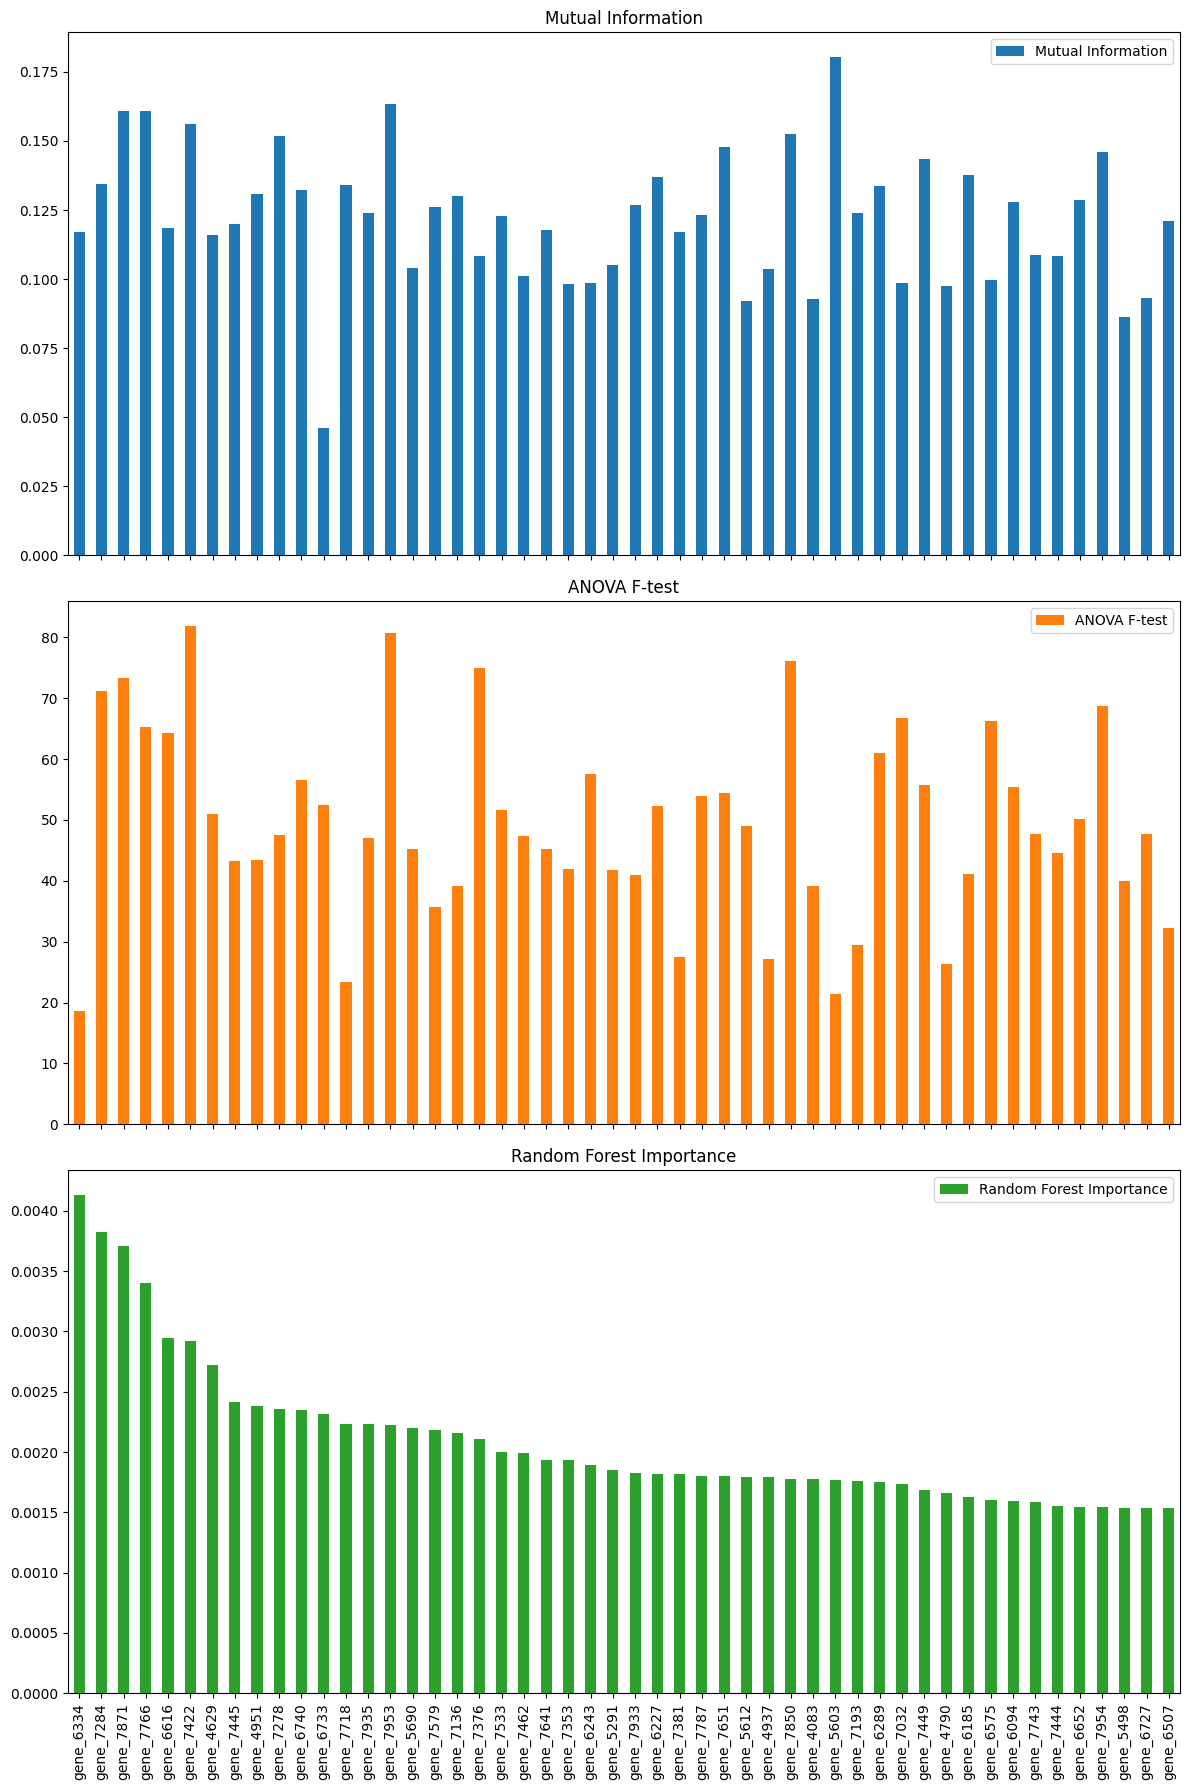

Selected Features (124):
{'gene_7195', 'gene_7871', 'gene_7284', 'gene_7476', 'gene_6507', 'gene_4083', 'gene_6915', 'gene_7788', 'gene_5603', 'gene_7273', 'gene_7550', 'gene_7954', 'gene_7353', 'gene_6289', 'gene_7231', 'gene_7659', 'gene_7805', 'gene_6094', 'gene_4629', 'gene_7989', 'gene_7032', 'gene_6740', 'gene_7509', 'gene_7755', 'gene_6421', 'gene_4790', 'gene_6014', 'gene_6575', 'gene_7850', 'gene_7579', 'gene_7773', 'gene_7933', 'gene_7504', 'gene_7813', 'gene_7764', 'gene_6182', 'gene_5612', 'gene_7048', 'gene_7953', 'gene_7787', 'gene_7136', 'gene_7330', 'gene_7428', 'gene_5208', 'gene_7376', 'gene_6271', 'gene_7896', 'gene_7445', 'gene_7641', 'gene_7422', 'gene_7985', 'gene_5445', 'gene_6227', 'gene_4867', 'gene_7449', 'gene_7898', 'gene_7278', 'gene_7785', 'gene_7718', 'gene_7760', 'gene_7335', 'gene_7944', 'gene_7743', 'gene_6652', 'gene_7931', 'gene_7307', 'gene_7614', 'gene_4079', 'gene_7774', 'gene_7462', 'gene_6916', 'gene_7976', 'gene_7651', 'gene_7705', 'gene_7566',

In [7]:
# Plot feature importances
plt.figure(figsize=(10, 6))
scores_df.loc[rf_features].sort_values(by='Random Forest Importance', ascending=False).plot(kind='bar', subplots=True, layout=(3, 1), figsize=(12, 18))
plt.tight_layout()
plt.show()

# Display the selected features
selected_features = set(mi_features).union(anova_features).union(rf_features)
print(f"Selected Features ({len(selected_features)}):")
print(selected_features)